In [53]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")


import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [26]:
# importing data
df = pd.read_csv("GDP_change.csv", parse_dates = True, index_col = 'Year')

In [10]:
df.head()

,Year
GDP,
-0.791615,1962
3.063226,1963
1.458597,1964
-10.088720,1965
2.580441,1966


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 1962-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     57 non-null     float64
dtypes: float64(1)
memory usage: 912.0 bytes


<AxesSubplot:xlabel='Year'>

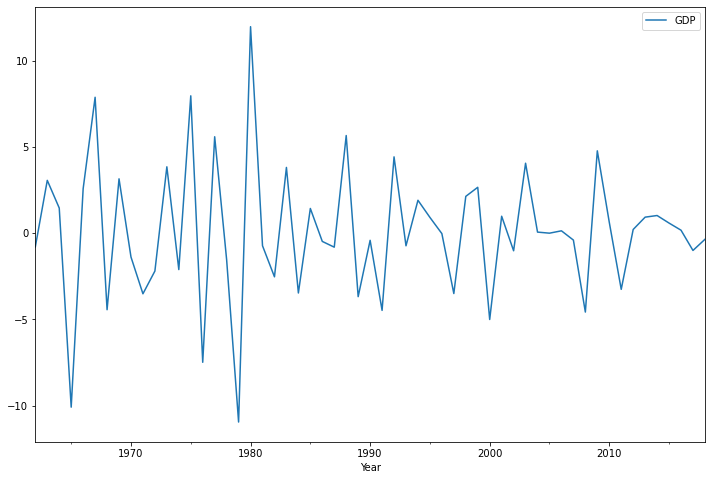

In [42]:
df.plot()

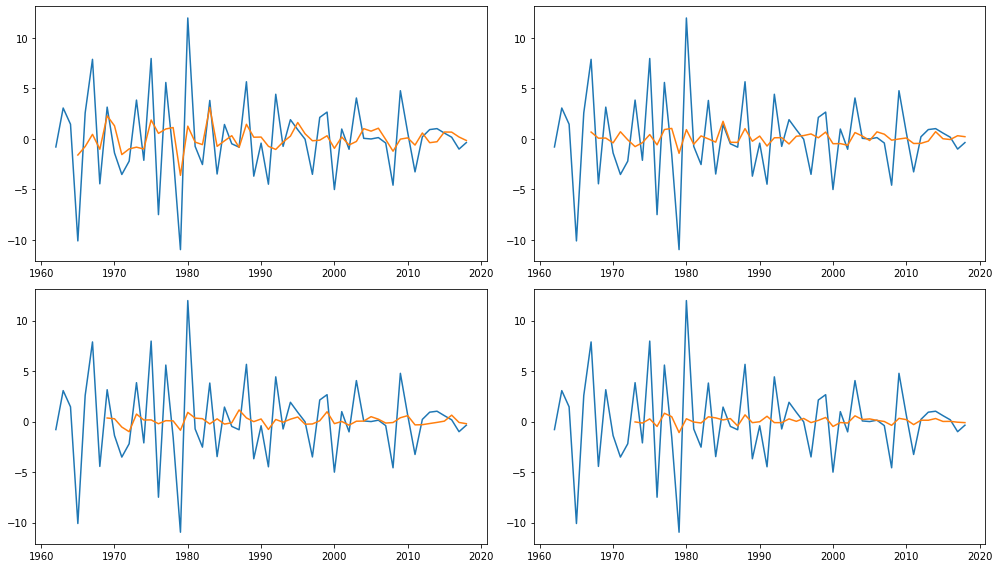

In [43]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(df.index, df, label='Original')
axes[0][0].plot(df.index, df.rolling(window=4).mean(), label='4-Months Rolling Mean')


axes[0][1].plot(df.index, df, label='Original')
axes[0][1].plot(df.index, df.rolling(window=6).mean(), label='6-Months Rolling Mean')


axes[1][0].plot(df.index, df, label='Original')
axes[1][0].plot(df.index, df.rolling(window=8).mean(), label='8-Months Rolling Mean')


axes[1][1].plot(df.index, df, label='Original')
axes[1][1].plot(df.index, df.rolling(window=12).mean(), label='12-Months Rolling Mean')


plt.tight_layout()
plt.show()

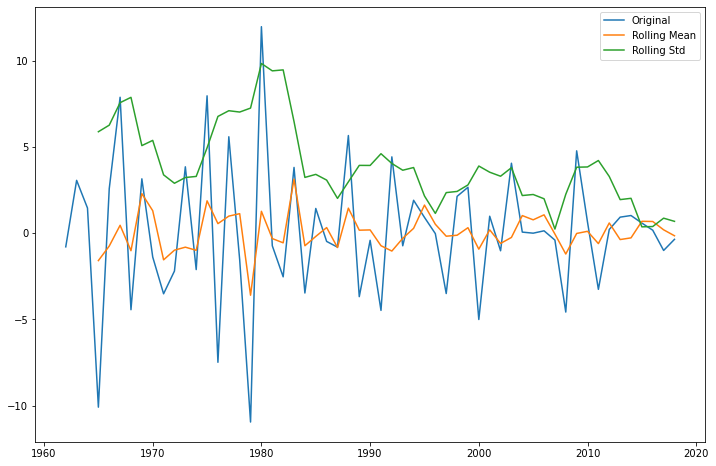

In [47]:
#Determing rolling statistics

rolmean = df.rolling(window = 4).mean()
rolstd = df.rolling(window = 4).std()
orig = plt.plot(df, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.show()

In [49]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -4.894
DF test p-value is 0.0000


In [51]:
df_diff = df.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
df_diff.dropna(inplace=True)

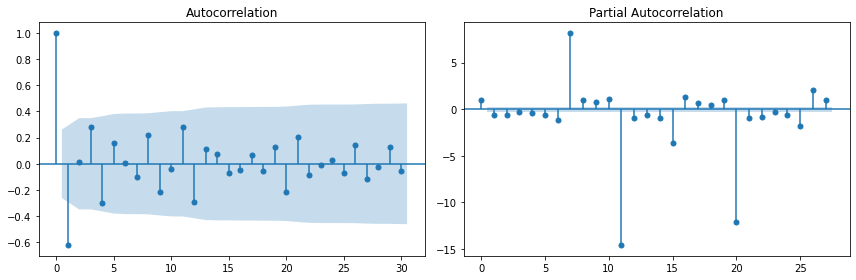

In [63]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(df_diff, lags=27, ax=axes[1])
plt.tight_layout()

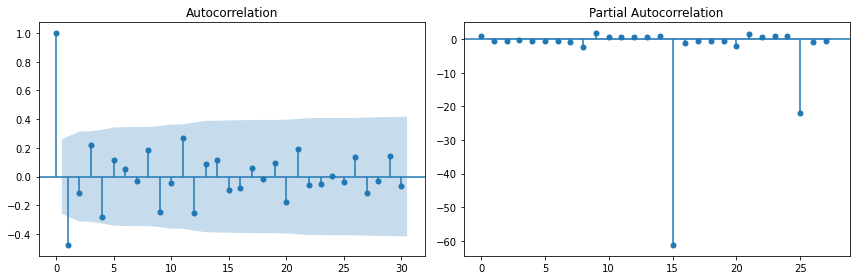

In [101]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df, lags=30, ax=axes[0])
smt.graphics.plot_pacf(df, lags=27, ax=axes[1])
plt.tight_layout()

In [66]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [85]:
# train=df[df.index.year <2011]
# test=df[df.index.year >2010]
train=df

In [75]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['GDP'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic)) 

ARIMA(0, 0, 0) - AIC:285.95695192974654
ARIMA(0, 0, 1) - AIC:250.2992583835375
ARIMA(0, 1, 0) - AIC:333.42274483197303
ARIMA(0, 1, 1) - AIC:287.06781674702995
ARIMA(1, 0, 0) - AIC:275.0623984921218


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   57
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -127.327
Date:                Sat, 09 Jan 2021   AIC                            266.655
Time:                        23:22:25   BIC                            278.476
Sample:                    01-01-1962   HQIC                           271.201
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5124      0.255     -2.008      0.045      -1.013      -0.012
ar.L2         -0.5553      0.188     -2.946      0.003      -0.925      -0.186
ma.L1         -0.7359      0.324     -2.273      0.0

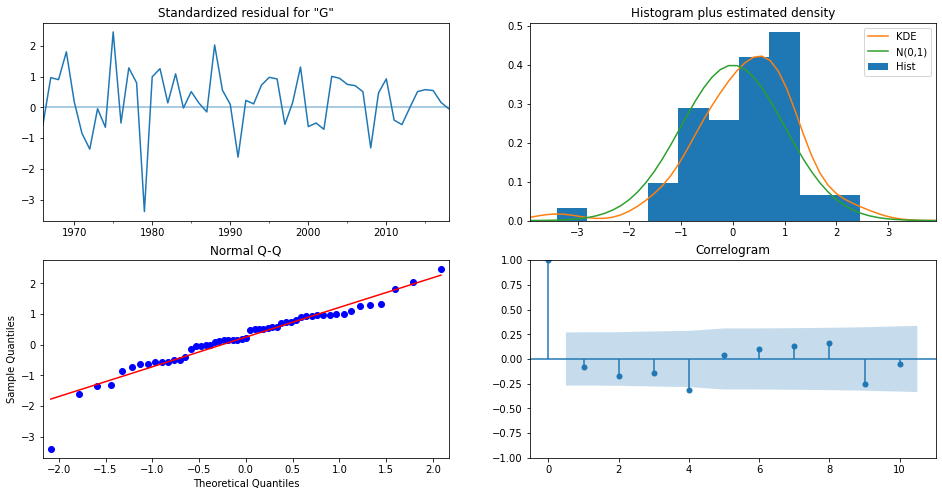

In [99]:
## ARIMA(2,0,2) has the lowest AIC
# mod = ARIMA(train['GDP'], order=(2,0,3))

# results_Arima = mod.fit()

SARIMA_model = sm.tsa.statespace.SARIMAX(df['GDP'],
                                            order=(2,0,3),
                                            seasonal_order=None,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results_Arima = SARIMA_model.fit()
print(results_Arima.summary())
results_Arima.plot_diagnostics(figsize=(16, 8))
plt.show()

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   57
Model:               SARIMAX(3, 0, 5)   Log Likelihood                -116.670
Date:                Sat, 09 Jan 2021   AIC                            251.339
Time:                        23:22:41   BIC                            268.726
Sample:                    01-01-1962   HQIC                           257.983
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8390      0.275     -3.051      0.002      -1.378      -0.300
ar.L2         -0.2864      0.341     -0.840      0.401      -0.955       0.382
ar.L3         -0.0527      0.223     -0.236      0.8

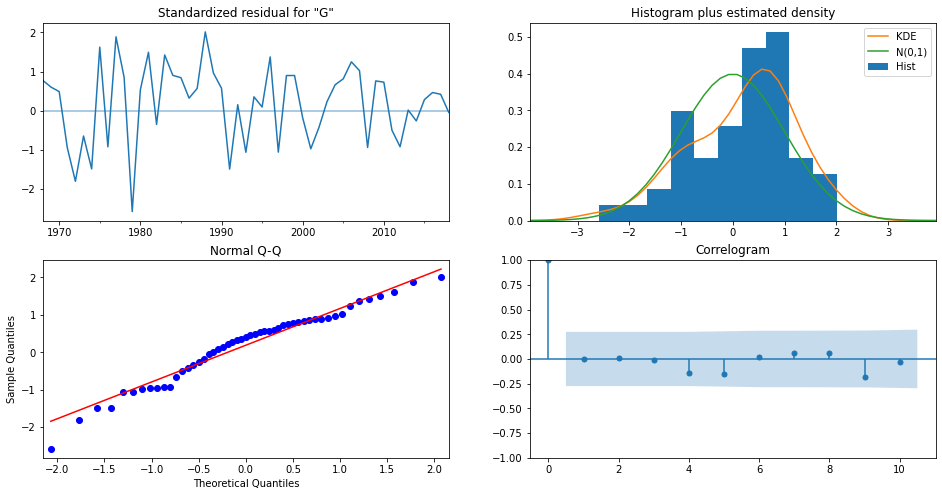

In [100]:

SARIMA_model = sm.tsa.statespace.SARIMAX(df['GDP'],
                                            order=(3,0,5),
                                            seasonal_order=None,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results_Arima = SARIMA_model.fit()
print(results_Arima.summary())
results_Arima.plot_diagnostics(figsize=(16, 8))
plt.show()

In [82]:
test.GDP= test.GDP.astype(float)
final_hat_avg =test.copy()
pred = results_Arima.forecast(steps=8)
pred[0]
test.shape

(8, 1)

In [83]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test.GDP,pred[0],squared=False)
print(rmse)

0.92521577358616
